## Chi-Square Goodness-Of-Fit Test

In our study of t-tests, we introduced the one-way t-test to check whether a sample mean differs from the expected (population) mean. The Chi-square goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution.

For example, you could use a chi-square goodness-of-fit test to check whether the race demographics of members at your college or company match that of the entire U.S. population or whether the computer browser preferences of your friends match those of internet users as a whole.

When working wiht categorical data, the values themselves aren't of much use for statistical testing because categories like "male", "female", and "other" have no mathematical meaning. Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.

In [1]:
import numpy as np
import pandas as pd

In [2]:
population = pd.DataFrame(
    ["white"] * 100000 +
    ["hispanic"] * 60000 +
    ["black"] * 50000 +
    ["asian"] * 15000 +
    ["other"] * 35000
)

sample = pd.DataFrame(
    ["white"] * 600 +
    ["hispanic"] * 300 +
    ["black"] * 250 +
    ["asian"] * 75 +
    ["other"] * 150
)

print("Population:")
display(population)

print("\nSample:")
display(sample)

Population:


,0
0,white
1,white
2,white
3,white
4,white
...,...
259995,other
259996,other
259997,other
259998,other



Sample:


,0
0,white
1,white
2,white
3,white
4,white
...,...
1370,other
1371,other
1372,other
1373,other


In [3]:
population_table =  pd.crosstab(index=population[0], columns='count')
sample_table = pd.crosstab(index=sample[0], columns='count')

print("Population:")
display(population_table)
print("\nSample:")
display(sample_table)

Population:


col_0,count
0,
asian,15000
black,50000
hispanic,60000
other,35000
white,100000



Sample:


col_0,count
0,
asian,75
black,250
hispanic,300
other,150
white,600


Chi-square tests are based on Chi-Square statistic. You can calculate the chi-square statistic using the following formula.

$$\sum\frac{(\text{observed} - \text{expected})^2}{\text{expected}}$$

In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. Let's calculate the chi-square statistic for our data to illustrate:

In [4]:
observed = sample_table

population_ratios = population_table / len(population)      # Get population ratios

print("Population ratios:")
display(population_ratios)

expected = population_ratios * len(sample)                  # Get expected counts

print("\nExpected:")
display(expected)

chi_squared_stat = (((observed - expected) ** 2) / expected).sum()
print(f"\nChi-square stat: {chi_squared_stat}")

Population ratios:


col_0,count
0,
asian,0.057692
black,0.192308
hispanic,0.230769
other,0.134615
white,0.384615



Expected:


col_0,count
0,
asian,79.326923
black,264.423077
hispanic,317.307692
other,185.096154
white,528.846154



Chi-square stat: col_0
count    18.194805
dtype: float64


**Note**: The chi-square test assumes none of the expected counts are less than 5.

Similar to the t-test where we compared the t-test statistic to a critical value based on the t-distribution to determine whether the result is significant, in the chi-square test we compare the chi-square test statistic to a critical value based on the [chi-square distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution). The scipy library shorthand for the chi-square distribution is chi2.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128051634000049-u04-08-9780128051634.jpg" width=500 />

<img src="https://www.statology.org/wp-content/uploads/2020/01/chi_square_table_small.jpg" width=600/>

In [5]:
from scipy.stats import chi2
crit = chi2.ppf(
    q=0.95,         # The critical value for 95% confidence level (5% alpha)
    df=4            # Degrees of Freedom = Number of categorical values - 1
)

print(f"Critical value: {crit}")

p_value = 1 - chi2.cdf(x=chi_squared_stat, df=4)

print(f"p-value: {p_value}")

Critical value: 9.487729036781154
p-value: [0.00113047]


**Important Note**: We are only interested in the right tail of the chi-square distribution.

Since our chi-square statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are same.

We can also use a chi-square goodness-of-fit test automatically using the scipy function scipy.stats.chisquare()

In [6]:
from scipy.stats import chisquare

chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

### Chi-Square Test of Independence

[Independence](https://en.wikipedia.org/wiki/Independence_(probability_theory)) is a key concept in probability that describes a situation where knowing the value of one variabel tells you nothing about the value of another. For instance, the month you were born probably doesn't tell you anything about which web browser you use, so we'd expect birth month and browser preference to be independent. On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.

The chi-square test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race, and religion.

In [7]:
np.random.seed(10)

# Sample data generated randomly at fixed probabilities
voter_race = np.random.choice(
    a=['asian', 'black', 'hispanic', 'other', 'white'],
    p=[0.05, 0.15, 0.25, 0.05, 0.5],
    size=1000
)

voter_party = np.random.choice(
    a=['democrat', 'independent', 'republican'],
    p=[0.4, 0.2, 0.4],
    size=1000
)

voters = pd.DataFrame({
    'race': voter_race,
    'party': voter_party
})

print("Voters:")
display(voters)

voters_table = pd.crosstab(voters.race, voters.party, margins=True)
voters_table.columns = ['democrat', 'independent', 'republican', 'row_totals']
voters_table.index = ['asian', 'black', 'hispanic', 'other', 'white', 'col_totals']

print("\n\nVoters Table:")
display(voters_table)

Voters:


,race,party
0,white,democrat
1,asian,republican
2,white,independent
3,white,republican
4,other,democrat
...,...,...
995,white,republican
996,hispanic,independent
997,black,independent
998,white,republican




Voters Table:


,democrat,independent,republican,row_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_totals,397,186,417,1000


In [8]:
observed = voters_table.iloc[0:5, 0:3]     # Get tabel without totals for later use
display(observed)

,democrat,independent,republican
asian,21,7,32
black,65,25,64
hispanic,107,50,94
other,15,8,15
white,189,96,212


Note that we did not use the race data to inform our generation of party data so the variables are independent.

For a test of independence, we use the same chi-square formula that we used for the goodness-of-fit test. THe main difference is we have the calculate the expected counts of each cell in a 2-dimensional table instead of a 1-dimensional tablle. To get the expected count of a cell, multiply the row total for that cell by the column total for that cell and then divide by the total number of obersvations. We can quickly get the expect counts for all cells in the table by taking the row totals and column totals of the table, performing an **outer product** on them with the np.outer() function and dividing by the number of observations.

In [9]:
expected = np.outer(
    voters_table['row_totals'][0:5],
    voters_table.loc['col_totals'][0:3]
) / 1000

expected = pd.DataFrame(expected)

expected.columns = ['democrat', 'independent', 'republican']
expected.index = ['asian', 'black', 'hispanic', 'other', 'white']

display(expected)

,democrat,independent,republican
asian,23.820,11.160,25.020
black,61.138,28.644,64.218
hispanic,99.647,46.686,104.667
other,15.086,7.068,15.846
white,197.309,92.442,207.249


Now we can follow the same steps we took before to calcualte the chi-square statistic, the critical value and the p-value.

In [10]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(f"\nChi-square stat: {chi_squared_stat}")


Chi-square stat: 7.169321280162059


Note: we call sum() twice: once to get the column sums and a second time to add the column sums together, returning the sum of the entire 2D table.

In [11]:
from scipy.stats import chi2

crit = chi2.ppf(
    q=0.95,     # Find the critical value for 95% confidence level
    df=8
)

print(f"Critical value: {crit}")

p_value = 1 - chi2.cdf(x=chi_squared_stat, df=8)

print(f"p-value: {p_value}")

Critical value: 15.50731305586545
p-value: 0.518479392948842


**Note**: The degrees of freedom for a test of independence equals the product of the number of categories in each variable minus 1. In this case we have 5x3 table so df=4x2 = 8.

As with the goodness-of-fit test, we can use scipy to conduct a test of independence quickly. Use scipy.stats.chi2_contingency() function to conduct a test of independence automatically given a frequency table of observed counts.

In [12]:
from scipy.stats import chi2_contingency

result = chi2_contingency(observed=observed)

print(result)

print(f'\nStatistic: {result.statistic}')
print(f'\np-value: {result.pvalue}')

Chi2ContingencyResult(statistic=7.169321280162059, pvalue=0.518479392948842, dof=8, expected_freq=array([[ 23.82 ,  11.16 ,  25.02 ],
       [ 61.138,  28.644,  64.218],
       [ 99.647,  46.686, 104.667],
       [ 15.086,   7.068,  15.846],
       [197.309,  92.442, 207.249]]))

Statistic: 7.169321280162059

p-value: 0.518479392948842


The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.
As expected, given the high p-value, the test result does not detect a significant relationship between the variables.

<br>

### ANOVA
#### One-Way ANOVA
The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. It essentially answers the question: do any of the group means differ from one another ? We won't get into the details of carrying out an ANOVA by hand as it involves more calculations than the t-test, but the process is similar: you go through several calculations to arrive at a test-statistic and then you compare the test-statistic to a critical value based on a probability distribution.
In the case of the ANOVA, you use the [f-distribution](https://en.wikipedia.org/wiki/F-distribution).

The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway().

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from scipy.stats import poisson
from pprint import pprint
np.random.seed(12)

races = ['asian', 'black', 'hispanic', 'other', 'white']

# Generate random data
voter_race = np.random.choice(
    a=races,
    p=[0.05, 0.15, 0.25, 0.05, 0.5],
    size=1000
)

voter_age = poisson.rvs(loc=18, mu=30, size=1000)

# Group age data by race
voters = pd.DataFrame({'race': voter_race, 'age': voter_age})

groups = voters.groupby('race').groups

display(groups)

{'asian': [4, 7, 14, 21, 49, 53, 59, 78, 95, 98, 135, 136, 162, 203, 227, 264, 278, 289, 326, 335, 345, 373, 430, 480, 484, 491, 516, 587, 602, 684, 692, 708, 715, 761, 776, 826, 828, 832, 853, 897, 942, 951, 986, 996], 'black': [0, 9, 19, 22, 23, 42, 50, 56, 62, 76, 105, 108, 119, 120, 124, 126, 131, 134, 138, 143, 152, 167, 171, 178, 182, 184, 202, 206, 211, 213, 229, 233, 236, 238, 242, 243, 245, 249, 253, 259, 261, 265, 266, 281, 287, 290, 294, 299, 303, 312, 314, 320, 328, 332, 333, 340, 349, 379, 383, 389, 394, 409, 411, 412, 420, 427, 438, 456, 457, 464, 469, 472, 476, 478, 479, 486, 488, 492, 497, 498, 508, 518, 521, 534, 536, 552, 555, 557, 568, 574, 601, 607, 609, 615, 620, 624, 625, 628, 636, 646, ...], 'hispanic': [2, 10, 24, 28, 31, 32, 38, 40, 44, 45, 47, 54, 55, 58, 63, 71, 74, 83, 87, 88, 89, 91, 100, 104, 109, 110, 111, 113, 114, 117, 121, 123, 128, 132, 133, 139, 144, 145, 148, 155, 156, 158, 159, 168, 169, 172, 173, 188, 191, 195, 209, 210, 217, 218, 220, 223, 224, 2

In [15]:
# Extracting individual groups

asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
other = voter_age[groups['other']]
white = voter_age[groups['white']]

display(asian)

array([56, 52, 37, 50, 53, 47, 56, 43, 46, 54, 45, 54, 42, 44, 55, 50, 45,
       49, 51, 57, 56, 46, 43, 53, 48, 54, 54, 44, 40, 46, 51, 52, 44, 54,
       43, 44, 53, 42, 54, 44, 59, 47, 54, 40])

In [16]:
# Perform the ANOVA
from scipy.stats import f_oneway

f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

The test output yields a f-statistic of 1.774 and a p-value of 0.1317, indicating that there is no significant difference between the means of each group (as p-value > 0.05, we fail to reject the null hypothesis).

Now let's make new age data where the group means do differ and run a second ANOVA:

In [17]:
np.random.seed(12)

# Generate random data
voter_race = np.random.choice(
    a=races,
    p=[0.05, 0.15, 0.25, 0.05, 0.5],
    size=1000
)

# Use a different distribution for ages of white people
white_ages = poisson.rvs(loc=18, mu=32, size=1000)

voter_age = poisson.rvs(loc=18, mu=30, size=1000)

voter_age = np.where(voter_race=='white', white_ages, voter_age)

# Group age data by race
voters = pd.DataFrame({'race': voter_race, 'age': voter_age})

groups = voters.groupby('race').groups

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

The test results suggest the group don't have the same sample mean in this case, since the p-value is significant at even 99% confidence level (i.e. p-value < 0.01). We know that it is the white voters who differ because we set it up that way in the code, but when testing real data, you may not know which group(s) caused the test to throw a positive result. To check groups differ after getting a positive ANOVA result, you can perform a follow up test or "post-hoc" test.

One post-hoc test is to perform a separate t-test for each pair of groups. You can perform a t-test between all pairs by running each pair through scipy.stats.ttest_ind() we previously covered.

In [18]:
# Get all race pairs
race_pairs = list()

for race1 in range(4):
    for race2 in range(race1+1, 5):
        race_pairs.append((races[race1], races[race2]))

print(f"Race pairs: {race_pairs}")

Race pairs: [('asian', 'black'), ('asian', 'hispanic'), ('asian', 'other'), ('asian', 'white'), ('black', 'hispanic'), ('black', 'other'), ('black', 'white'), ('hispanic', 'other'), ('hispanic', 'white'), ('other', 'white')]


In [19]:
# Conduct t-test on each pair
from scipy.stats import ttest_ind

for race1, race2 in race_pairs:
    print(f"\n{race1} - {race2} t-test")
    print(ttest_ind(voter_age[groups[race1]], voter_age[groups[race2]]))


asian - black t-test
TtestResult(statistic=0.8386446909747979, pvalue=0.4027281369339345, df=189.0)

asian - hispanic t-test
TtestResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726, df=286.0)

asian - other t-test
TtestResult(statistic=0.9795284739636, pvalue=0.3298877500095151, df=92.0)

asian - white t-test
TtestResult(statistic=-2.318108811252288, pvalue=0.020804701566400217, df=557.0)

black - hispanic t-test
TtestResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594, df=389.0)

black - other t-test
TtestResult(statistic=0.28025754367057176, pvalue=0.7795770111117659, df=195.0)

black - white t-test
TtestResult(statistic=-5.379303881281834, pvalue=1.0394212166624012e-07, df=660.0)

hispanic - other t-test
TtestResult(statistic=1.5853626170340225, pvalue=0.11396630528484335, df=292.0)

hispanic - white t-test
TtestResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684, df=757.0)

other - white t-test
TtestResult(statistic=-3.763809322077872, pva

The p-values for each pairwise t-test suggest mean of white voters is likely different from the other groups, since the p-values for each t-test involving the white group is below 0.05. Using unadjusted pairwise t-tests can overestimate significance, however, because the more comparisons you make, the more likely you are to come across an unlikely result due to chance. We can adjust for this multiple comparison problem by dividing the statistical significance level by the number of comparisons made. In this case, if we were looking for a significance level of 5%, we'd be looking for p-values of 0.05/10 = 0.005 or less. This simple adjustment for multiple comparisons is known as the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction).

The Bonferroni correction is a conservative approach to account for the multiple comparisons problem that may end up rejecting results that are actually significant. Another common post hoc-test is [Tukey's test](https://en.wikipedia.org/wiki/Tukey%27s_range_test). You can carry out Tukey's test using the pairwise_tukeyhsd() function in the statsmodels.stats.multicomp library:

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8032,0.9208,-3.4423,1.836,False
asian,hispanic,0.4143,0.9915,-2.1011,2.9297,False
asian,other,-1.0645,0.8906,-4.2391,2.11,False
asian,white,1.9547,0.1751,-0.4575,4.3668,False
black,hispanic,1.2175,0.2318,-0.386,2.821,False
black,other,-0.2614,0.9986,-2.7757,2.253,False
black,white,2.7579,0.0,1.3217,4.194,True
hispanic,other,-1.4789,0.4374,-3.863,0.9053,False
hispanic,white,1.5404,0.004,0.3468,2.734,True
other,white,3.0192,0.0028,0.7443,5.2941,True


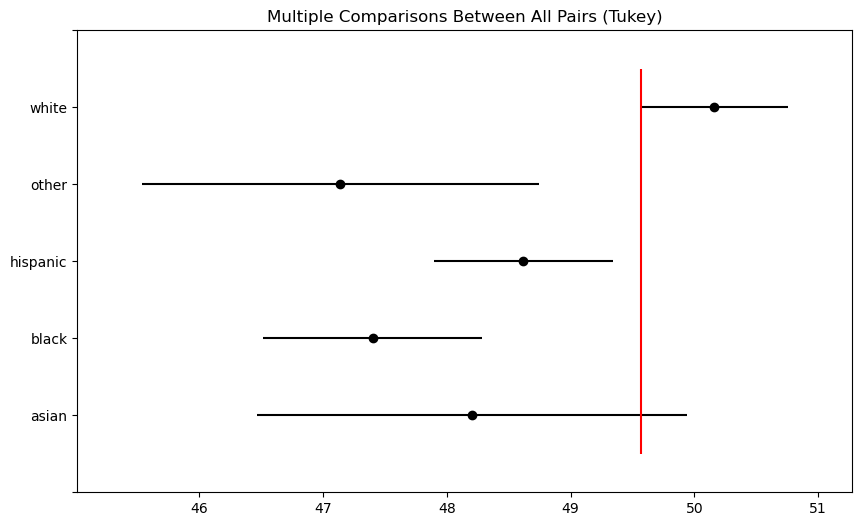

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=voter_age,    # Data
    groups=voter_race,  # Groups
    alpha=0.05          # Significance level
)

# Plot group confidence intervals
tukey.plot_simultaneous()
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()

The output of the Tukey test shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. In this case, the test suggests we reject the null hypothesis for 3 pairs, with each pair including the "white" category. This suggests the white group is likely different from the others. The 95% confidence interval plot reinforces the results visually: only 1 other group's confidence interval overlaps the white group's confidence interval.